# IpyWidgets

<div class="alert alert-info" style="margin: 20px">
The one of the best things about jupyter notebook is its interactive nature. With widgets, ,it becomes even more interactive</div>

## Introduction

### First level of Abstraction

* Suppose we are investigating square of some value, we can do it like:

In [1]:
11 * 11

121

In [2]:
10 * 10

100

* But if we want to achive that with less code we can do it like:

In [7]:
x = 12

In [8]:
x * x

144

In [5]:
x = 11

In [9]:
x * x

144

* Or we can define a function for that(which will be our first level of abstraction)

In [10]:
def f(x):
    return x * x

In [11]:
f(3)

9

In [12]:
f(4)

16

### Hmm, what about more interactive approach?

<div class="alert alert-info" style="margin: 20px">
We used square function as an abstraction but it can be better. What if instead of changing value by hand and re-run the method each time, we could dynamically change the value and see the corresponding output ?
</div>

<div class="alert alert-block alert-success" style="margin: 20px">
Well, we can do that with widgets!
</div>

In [13]:
from ipywidgets import *

In [14]:
interact(f, x = (0, 20));

interactive(children=(IntSlider(value=10, description='x', max=20), Output()), _dom_classes=('widget-interact'…

* Computers are fast, humans aren't. Every time we re-type values, it will be slow. So widget abstraction makes it faster for us to interact with code

### What are widgets ?

<div class="alert alert-info" style="margin: 20px">
Widgets are objects that enable us to control/change values using visual objects, like slider. </div>




In [14]:
??FloatSlider

In [15]:
slider = FloatSlider(value=10.0, min=5.0, max=20.0, step=0.1, description="Value:")

In [17]:
slider

FloatSlider(value=18.8, description='Value:', max=20.0, min=5.0)

* You can display same widget object multiple times, but since they are same objects, their values will be same too

In [18]:
slider

FloatSlider(value=18.8, description='Value:', max=20.0, min=5.0)

#### .value

* We can access value of the widget as:

In [20]:
slider.value

13.1

* You can also change the value of slider, the value on visual slider will change accordingly

In [21]:
slider

FloatSlider(value=13.1, description='Value:', max=20.0, min=5.0)

In [23]:
slider.value = 12

#### Linking two Widgets

In [28]:
widget2 = FloatText(description="Value")

In [29]:
link((slider,"value"), (widget2, "value"));

In [30]:
slider

FloatSlider(value=13.3, description='Value:', max=20.0, min=5.0)

In [31]:
widget2

FloatText(value=13.3, description='Value')

### Components of ipywidgets

<div class="alert alert-info" style="margin: 20px">

<b>ipywidgets compose of:</b>

1) Python (runs in the background)

2) Javascript (runs in the browser)</div>

<div class="alert alert-info" style="margin: 20px">
In this lesson we will only focus on writing widgets in python
</div>

## `interact`

<div class="alert alert-info" style="margin: 20px">
Interact function creates user linterface controls automatically without writing our own widgets etc. . So it is a good place to start exploring widgets
</div>

In [32]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

* It creates UI controls (like slider, textbox etc.) and calls the function that we give it with those interactive arguments.

In [38]:
def f(x):
    return x * 5

In [39]:
interact(f, x=4);

interactive(children=(IntSlider(value=4, description='x', max=12, min=-4), Output()), _dom_classes=('widget-in…

* We gave integer value (x=4), so interact created integer slider

* We can also give it like:

In [48]:
interact(f, x=(4,10));

interactive(children=(IntSlider(value=7, description='x', max=10, min=4), Output()), _dom_classes=('widget-int…

In [49]:
interact(f, x=(4,10,2));

interactive(children=(IntSlider(value=6, description='x', max=10, min=4, step=2), Output()), _dom_classes=('wi…

* If we gave True or False, it would generate checkbox

In [47]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

* And textbox for string:

In [60]:
interact(f, x="Hey")

interactive(children=(Text(value='Hey', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

### Using interact as a decorator

In [52]:
@interact(x=5, y=3.0)
def g(x, y):
    return(x + y)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), FloatSlider(value=3.0, description=…

### Why do we put ; at the end

* We are putting ; at the end to surpress the display of function output. interact gives function output because output of interact is a function, like:

In [54]:
def twice(func):
    def wrapper():
        func()
        func()
    return wrapper

In [55]:
def say_hey():
    print("hey")

In [56]:
a = say_hey

In [58]:
twice(a)

<function __main__.twice.<locals>.wrapper()>

In [59]:
twice(a)()

hey
hey


### Passing Widget Explicitly

In [78]:
s = widgets.IntSlider(min = -5, max = 20, step = 2, value = 10)

In [79]:
s

IntSlider(value=10, max=20, min=-5, step=2)

In [80]:
interact(f, x=s);

interactive(children=(IntSlider(value=10, description='x', max=20, min=-5, step=2), Output()), _dom_classes=('…

### Giving fixed argument

In [93]:
def h(a, b=2):
    return a, b

In [94]:
interact(h, a = 4);

interactive(children=(IntSlider(value=4, description='a', max=12, min=-4), IntSlider(value=2, description='b',…

* If your function has more than one parameter, and you want to create GUI for just few of them, you can use `fixed` for that

In [95]:
interact(h, a = 4, b = fixed(10));

interactive(children=(IntSlider(value=4, description='a', max=12, min=-4), Output()), _dom_classes=('widget-in…

### Dropdown Menu

In [96]:
def f(x):
    return x

In [97]:
interact(f, x=["product A", "Product B"]);

interactive(children=(Dropdown(description='x', options=('product A', 'Product B'), value='product A'), Output…

* If we want to know which product value user is giving and then calculate another things with it, we can give it like key, value pair.

* In this example our function will return the price of the product we are giving

* User will see keys, but corresponding values will be passed to the function

In [98]:
interact(f, x=[("product A", 300), ("Product B",250)]);

interactive(children=(Dropdown(description='x', options=(('product A', 300), ('Product B', 250)), value=300), …

## `interactive`

* `interactive` function returns a widget instance. It is useful when we want to reuse the widget that we have created and access to data that is bound to that widget

In [99]:
a = interact(f, x=[("product A", 300), ("Product B",250)]);

interactive(children=(Dropdown(description='x', options=(('product A', 300), ('Product B', 250)), value=300), …

In [100]:
a = interactive(f, x=[("product A", 300), ("Product B",250)]);

* Because of interactive does not return a value but a widget instance, return value of the function will not be displayed. We will use `IPython.display.display` to display that.

In [58]:
from IPython.display import display

In [101]:
def f(x, y):
    
    display(x, y)

    return x + y

In [102]:
w = interactive(f, x = 5, y = 3)

* It is just like `interact`, it creates GUI controls but do not display it 

In [103]:
type(w)

ipywidgets.widgets.interaction.interactive

### children 

In [105]:
w.children

(IntSlider(value=5, description='x', max=15, min=-5),
 IntSlider(value=3, description='y', max=9, min=-3),
 Output())

### display

In [106]:
display(w)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), IntSlider(value=3, description='y',…

*`Show`: Show what happens when we use `print` instead of `display` in `f`

In [107]:
def f(x, y):
    
    print(x, y)

    return x + y

In [108]:
w2 = interactive(f, x = 5, y = 3)

In [112]:
display(w2)

interactive(children=(IntSlider(value=2, description='x', max=15, min=-5), IntSlider(value=7, description='y',…

### Accessing parameter values

In [115]:
w2.kwargs

{'x': 11, 'y': -2}

### Result of the function

In [117]:
w2.result

8

## Interactive Plot

In [118]:
import matplotlib.pyplot as plt
import numpy as np

In [119]:
import random

### Example 1

In [127]:
def f(n_dots):
    x,y=[],[]
    for i in range(n_dots):
        x.append(random.randint(1,100))
        y.append(random.randint(1,100))
    plt.scatter(x,y)
    
    

In [129]:
w = interactive(f, n_dots=(1,30))

* Changing the name of the slider


In [130]:
w.children

(IntSlider(value=15, description='n_dots', max=30, min=1), Output())

In [138]:
w.children[0].description = "# of points"

In [139]:
w

interactive(children=(IntSlider(value=14, description='# of points', max=30, min=1), Output(outputs=({'output_…

### Example 2

* We will plot $ax + b$

In [158]:
def f2(a, b):
    x = np.linspace(-20, 20, num = 2000)
    plt.plot(x, a*x + b)
    plt.ylim(-20,20)
    
    

* Before interactive, function is just statically calculating the output (in this case there is no return statement, it will just plot with given parameters)

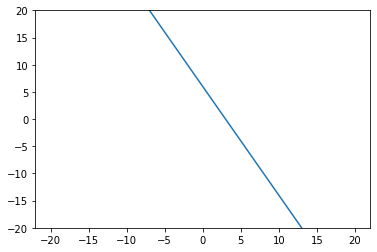

In [166]:
f2(-2,6)

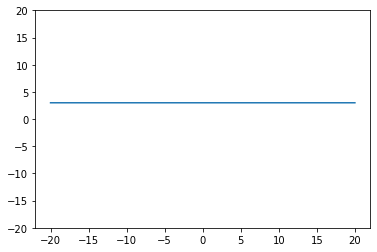

In [155]:
f2(0,3)

In [156]:
w2 = interactive(f2, a=(-5,5), b = (-10, 10))

In [157]:
w2

interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

* Changing the name of the slider

## Continuous and Discontinuous Updates

<div class="alert alert-info" style="margin: 10px">
So far we have only seen continuous update case. That is - when we slide values in slider, it updates for all the values in between. But we may not want to do that and it may be computationally expensive for some cases

</div>

<div class="alert alert-info" style="margin: 10px">
So we will disable continuous updates for that. So it will update our function whenever we press the button or release mouse etc.
</div>

In [169]:
def f2(a, b):
    x = np.linspace(-20, 20, num = 2000)
    plt.plot(x, a*x + b)
    plt.ylim(-10,10)

### First way: `interact_manual`

In [170]:
interact_manual(f2, a=(-5,5), b = (-10, 10));

interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

### Second way: `continuous_update`

* For slider widgets we can set `continuous_update` argument to `False`

* It will update when we release our mouse

In [187]:
a = widgets.IntSlider(min=-5, max=5, continuous_update = False)

In [188]:
b = widgets.IntSlider(min=-10, max=10, continuous_update = False)

In [189]:
w = interactive(f2, a=a, b = b)

In [190]:
w

interactive(children=(IntSlider(value=0, continuous_update=False, description='a', max=5, min=-5), IntSlider(v…

* Or:

In [191]:
w = interactive(f2, a=(-5,5), b = (-10, 10))

* So far we have only seen continuous update case. That is - when we slide values in slider, it updates for all the values in between. But we may not want to do that and it may be computationally expensive for some cases

In [192]:
w.children

(IntSlider(value=0, description='a', max=5, min=-5),
 IntSlider(value=0, description='b', max=10, min=-10),
 Output())

* So we will disable continuous updates for that. So it will update our function whenever we press the button or release mouse etc.

In [194]:
w.children[0].continuous_update = False

In [198]:
w

interactive(children=(IntSlider(value=-5, continuous_update=False, description='a', max=5, min=-10), IntSlider…

In [199]:
w.children[1].continuous_update = False

In [200]:
w

interactive(children=(IntSlider(value=-5, continuous_update=False, description='a', max=5, min=-10), IntSlider…

### Third Way: using dict

In [207]:
w = interactive(f2, {"manual" : True}, a=(-5,5), b = (-10, 10))

In [208]:
w

interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

In [209]:
w.children

(IntSlider(value=-2, description='a', max=5, min=-5),
 IntSlider(value=3, description='b', max=10, min=-10),
 Button(description='Run Interact', style=ButtonStyle()),
 Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 1 Axes>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAYIAAAD8CAYAAAB6paOMAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAZR0lEQVR4nO3df4ychZ3f8fdn1+sAxhhjr83OmhgHfIANzBzZulByueQgxHbw7uWaa6HqlepSWahEuvRaKZyi5qJEqsqdcjnlkgY5BTWtovzoJcRrYgI2zQVQG8zCee0FBzDGEf6BvWBi89Ng+PaPecYMy+x6f8wzz8w8n5c08szzPDv71aOxP55nnnk+igjMzCy/OrIewMzMsuUgMDPLOQeBmVnOOQjMzHLOQWBmlnMOAjOznKtLEEi6U9JhSSNVy86RtEXS08mf88f52ZuSbZ6WdFM95jEzs8mr1zuC/wGsHrPsVuD+iFgO3J88fg9J5wB/CfxTYBXwl+MFhpmZpaMuQRARDwBHxiweAL6b3P8u8Ic1fvSTwJaIOBIRLwFbeH+gmJlZimal+NyLI+IgQEQclLSoxja9wHNVj/cly95H0npgPcCcOXM+fPHFF9d5XGtHL79xgr0vvsrSc87grNO7sh7HLFOPPvroCxHRPXZ5mkEwGaqxrOY1LyJiA7ABoK+vL4aGht

* We can change the name of the button as:

In [210]:
w = interactive(f2, {"manual" : True, "manual_name":"Plot"}, a=(-5,5), b = (-10, 10))

In [211]:
w

interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=0, description='b', …

## `interactive_output`

* `interactive_output` enables us to have more control over the layout of UI elements.

* We can create widgets, put it in a box and then pass it to `interactive_output`

In [213]:
x = widgets.IntSlider()
y = widgets.IntSlider()
z = widgets.IntSlider()

* Creating box for these widgets

In [227]:
box = widgets.VBox([x, y, z])

In [228]:
box

In [220]:
def f(x, y, z):
    print(x,y,z)

* `interactive_output` is creating output region, and link sliders to arguments of the function 

* It divides process to  output and control steps

In [223]:
out = widgets.interactive_output(f, {"x":x, "y":y, "z":z})

In [224]:
out

Output(outputs=({'output_type': 'stream', 'text': '61 49 67\n', 'name': 'stdout'},))

In [229]:
display(box, out)

Output(outputs=({'output_type': 'stream', 'text': '74 58 46\n', 'name': 'stdout'},))

## Exercises

### 1) Write a function that reverse the string that we gave it. Use widgets to give string interactively

In [230]:
def reverse(x):
    return x[::-1]

In [231]:
reverse("hey")

'yeh'

In [232]:
w = interact(reverse, x="")

interactive(children=(Text(value='', description='x'), Output()), _dom_classes=('widget-interact',))

### 2) Use `interact` as a decorator to make the output of the function below interactive and then disable continuous update:

In [233]:
def f(a, b):
    x = np.linspace(0, 4 * np.pi)
    y = np.cos(a*x + b)
    plt.plot(x, y)

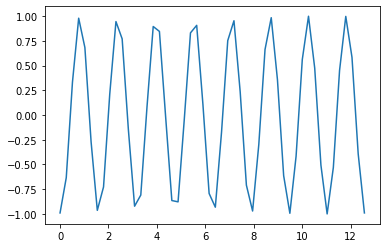

In [234]:
f(4, 3)

In [235]:
@interact(a=(1,10), b=(0, 10))
def f(a, b):
    x = np.linspace(0, 4 * np.pi)
    y = np.cos(a*x + b)
    plt.plot(x, y)

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …

In [237]:
@interact_manual(a=(1,10), b=(0, 10))
def f(a, b):
    x = np.linspace(0, 4 * np.pi)
    y = np.cos(a*x + b)
    plt.plot(x, y)

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …